In [1]:
#!/usr/bin/env python
import matplotlib
%matplotlib inline 
matplotlib.use('Agg')
from __future__ import print_function
import argparse

import chainer
import chainer.functions as F
import chainer.links as L
from chainer import training
from chainer.training import extensions

from links import communicator

import numpy as np

try:
    from tqdm import tqdm
except:
    tqdm = list

import json

/home/sosuke.k/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
def generate(model, data, train=False, printer=False):
    import matplotlib
    matplotlib.use('Agg')
    import matplotlib.pyplot as plt
    prev_train = model.train
    model.train = train
    sentence_history, log_prob_history, canvas_history = model(data, generate=True)
    canvas_history = [c * 255 for c in canvas_history]
    true_image = data * 255
    model.train = prev_train

    def save_images(x, filename):
        x = np.array(x.tolist(), np.float32)
        width = x.shape[0]
        fig, ax = plt.subplots(1, width, figsize=(1*width, 1))#, dpi=20)
        for ai, xi in zip(ax.ravel(), x):
            ai.imshow(xi.reshape(28, 28), cmap='Greys_r')
        #fig.savefig(filename)

    for i in range(model.n_turn):
        save_images(canvas_history[i], str(train)+'{}.png'.format(i))
        #np.save(str(train)+'{}.npz'.format(i), np.array(canvas_history[i].tolist()))
        #if printer: print('save {}.png'.format(i))
    save_images(true_image.data, str(train)+'_.png')
    
    for i in range(data.shape[0]):
        for log_prob_batch, word_batch_list in zip(log_prob_history, sentence_history):
            if printer: print(str(i)+",\t", [int(word_batch[i]) for word_batch in word_batch_list], log_prob_batch[i])
        """
        save_target = [
            [
                [[int(word[i]) for word in sent] for sent in sentence_history],
                [float(lpb[i]) for lpb in log_prob_history]
            ]
            for i in range(data.shape[0])]
        """
    #json.dump(save_target, open(str(train)+'seq.json', 'w'))

In [7]:
model = communicator.World(28 * 28, 256, 256, n_vocab=32, n_word=2, n_turn=3)
train, test = chainer.datasets.get_mnist(withlabel=False)
import chainer.serializers as S
S.load_npz('../saved_model.model', model)

0,	 [29, 29] -0.000692487
0,	 [14, 23] -0.00350099
0,	 [29, 14] -0.410349
1,	 [24, 24] -0.492214
1,	 [10, 23] -0.00536786
1,	 [10, 29] -0.201245
2,	 [31, 29] -0.0142639
2,	 [10, 29] -0.000997329
2,	 [10, 10] -0.154377
3,	 [18, 23] -0.00143488
3,	 [14, 23] -0.165238
3,	 [21, 14] -0.0995244
4,	 [2, 29] -0.72477
4,	 [23, 10] -0.0460562
4,	 [14, 2] -0.497293
5,	 [31, 29] -0.0124124
5,	 [10, 29] -0.0123956
5,	 [10, 29] -0.0606625
6,	 [29, 10] -0.0144507
6,	 [23, 10] -0.00376432
6,	 [14, 29] -0.322418
7,	 [2, 10] -0.00529801
7,	 [31, 21] -0.524253
7,	 [18, 23] -0.431852
8,	 [2, 23] -0.518911
8,	 [14, 29] -0.0039461
8,	 [21, 23] -0.503981
9,	 [29, 2] -0.00260457
9,	 [29, 29] -0.000287911
9,	 [2, 14] -0.167702


/home/sosuke.k/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


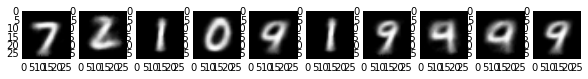

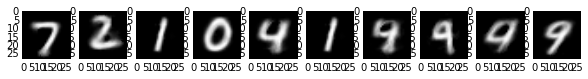

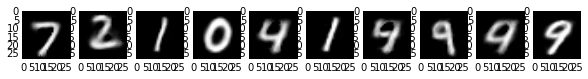

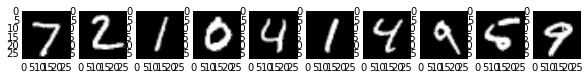

In [8]:
convert = chainer.dataset.convert.concat_examples
d = convert(test[:10])
d = chainer.Variable(model.xp.array(d.tolist(), np.float32), volatile='auto')
generate(model, d, train=False, printer=True)

In [ ]:
0,	 [29, 29] -0.000692487 #7
0,	 [14, 23] -0.00350099 #7のまま? 少しフに
0,	 [29, 14] -0.410349 #もっとフ. ちょっと右回転?
1,	 [24, 24] -0.492214 #上がほとんどないぼやけZ
1,	 [10, 23] -0.00536786 #Zにくっきり
1,	 [10, 29] -0.201245 #よりZにくっきり
2,	 [31, 29] -0.0142639 #1. 真ん中縦線
2,	 [10, 29] -0.000997329 #少し右回転
2,	 [10, 10] -0.154377 #もし少し右回転 & 細く
3,	 [18, 23] -0.00143488 #ぼやけ右流れ0
3,	 [14, 23] -0.165238 #くっきりめ
3,	 [21, 14] -0.0995244 #変化微妙
4,	 [2, 29] -0.72477 #qくらい. ぼやけ
4,	 [23, 10] -0.0460562 #上が開く. Чくらい. 下はぼやけ残り
4,	 [14, 2] -0.497293 #全体的にくっきり化
5,	 [31, 29] -0.0124124 #2のsampleと全部同じ
5,	 [10, 29] -0.0123956
5,	 [10, 29] -0.0606625
6,	 [29, 10] -0.0144507 #細めのシュッとした脚の9
6,	 [23, 10] -0.00376432 #ぼやっと太く. 上囲いは細く
6,	 [14, 29] -0.322418 #さらに横幅を広げつつ下は細く
7,	 [2, 10] -0.00529801
7,	 [31, 21] -0.524253
7,	 [18, 23] -0.431852
8,	 [2, 23] -0.518911
8,	 [14, 29] -0.0039461
8,	 [21, 23] -0.503981
9,	 [29, 2] -0.00260457
9,	 [29, 29] -0.000287911
9,	 [2, 14] -0.167702